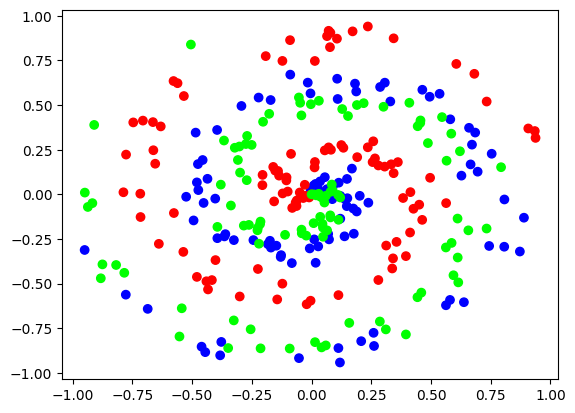

In [26]:
import numpy as np
!pip install nnfs
import nnfs
from nnfs.datasets import spiral_data

import matplotlib.pyplot as plt
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()


## Dense Layer Class

In [27]:
# Dense layer
class Layer_Dense:
 # Layer initialization
 def __init__(self, n_inputs, n_neurons):
 # Initialize weights and biases
   self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
   self.biases = np.zeros((1, n_neurons))

 # Forward pass
 def forward(self, inputs):
 # Calculate output values from inputs, weights and biases
   self.output = np.dot(inputs, self.weights) + self.biases








# Cross Entropy loss building blocks in Python
##### Calculating Network error with loss

In [28]:
softmax_outputs = np.array(
    [[0.7, 0.1, 0.2],
     [0.1, 0.5, 0.4],
     [0.02, 0.9, 0.08]
     ]
)

class_targets = [0,1,1]
print(softmax_outputs[[0,1,2], class_targets])

[0.7 0.5 0.9]


In [29]:
print(-np.log(softmax_outputs[
    range(len(softmax_outputs)), class_targets
]))

neg_log = -np.log(softmax_outputs[
    range(len(softmax_outputs)), class_targets
])
average_loss = np.mean(neg_log)
print(average_loss)

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


### IF DATA IS ONE HOT ENCODED, HOW TO EXTRACT THE RELEVANT PREDICTIONS

In [30]:
y_true_check = np.array([
    [0,1,0],
    [1,0,0],
    [0,0,1]
])

y_pred_clipped_check = np.array([
    [0.2, 0.7, 0.1],
    [0.8, 0.1, 0.1],
    [0.1, 0.2, 0.7]
])

y_true_check * y_pred_clipped_check

array([[0. , 0.7, 0. ],
       [0.8, 0. , 0. ],
       [0. , 0. , 0.7]])

### Implementing the loss class

In [31]:
# Common loss class
class Loss:
  # Calculate the data and regularization losses
  # given model output and ground truth values
  def calculate(self, output, y):
    # Calculate sample losses
    sample_losses = self.forward(output, y)
    # Calcualte mean loss
    data_loss = np.mean(sample_losses)
    # Return loss
    return data_loss

### Implementing the categorical cross entropy class

In [40]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
  # Forward pass
  def forward(self, y_pred, y_true):
    # Number of samples in a batch
    samples = len(y_pred)
    # Clip data to prevent division by 0
    # Clip both sides to not drag mean towards any value
    y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
    # Probabilities for target values -
    # only if categorical labels
    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[
        range(samples),
        y_true
      ]
      # Mask values - only for one-hot encoded labels
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(
          y_pred_clipped * y_true,
        axis=1
      )
      # losses
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods

In [33]:
softmax_outputs = np.array([
    [0.7, 0.1, 0.2],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]])

class_targets = np.array([
    [1,0,0],
    [0,1,0],
    [0,1,0]])

loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print('Loss:', loss)

Loss: 0.38506088005216804


## Full Code

In [34]:
# ReLU activation
class Activation_ReLU:
 # Forward pass
 def forward(self, inputs):
 # Calculate output values from input
  self.output = np.maximum(0, inputs)

In [35]:
# Softmax activation
class Activation_Softmax:
 # Forward pass
 def forward(self, inputs):
 # Get unnormalized probabilities
  exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
 # Normalize them for each sample
  probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
  self.output = probabilities

In [41]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense Layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)


# Create ReLU activation (to be used with Dense Layer):
activation1 = Activation_ReLU()

# Create Second dense layer with 3 input features (as we take output of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# Create Softmax activation (to be used with Dense Layer):
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)


# Perform a forward pass through activation function
# it takes the output of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)
# Let's see output of the first few samples:
print(activation2.output[:5])


# Perform a forward pass through activation function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)
# Print loss value
print('loss:', loss)


# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
 y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)
# Print accuracy
print('acc:', accuracy)




[[0.33333333 0.33333333 0.33333333]
 [0.33333285 0.33333346 0.33333369]
 [0.33333317 0.33333274 0.3333341 ]
 [0.33333235 0.33333319 0.33333446]
 [0.33333266 0.33333248 0.33333486]]
loss: 1.0986142536538108
acc: 0.32


## Introducing Accuracy


In [42]:
import numpy as np

# Probabilities of 3 samples
softmax_outputs = np.array([[0.7, 0.2, 0.1],
 [0.5, 0.1, 0.4],
 [0.02, 0.9, 0.08]])
# Target (ground-truth) labels for 3 samples
class_targets = np.array([0, 1, 1])
# Calculate values along second axis (axis of index 1)
predictions = np.argmax(softmax_outputs, axis=1)
# If targets are one-hot encoded - convert them
if len(class_targets.shape) == 2:
 class_targets = np.argmax(class_targets, axis=1)
# True evaluates to 1; False to 0
accuracy = np.mean(predictions == class_targets)
print('acc:', accuracy)


acc: 0.6666666666666666
